# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
from text_normalization import text_normalization
tf.random.set_seed(1)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open('Stories.txt', encoding='utf8').read().split("\n")
Corpus = [text_normalization(text) for text in Corpus]

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

10433

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

# Generate Train And Label Data For Model

In [6]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [7]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True,
)

**1-LSTM**

In [9]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [10]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [11]:
with tf.device('gpu:0'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 56s 42ms/step - loss: 8.0991 - accuracy: 0.0234
Epoch 2/150
1312/1312 [==============================] - 55s 42ms/step - loss: 7.3786 - accuracy: 0.0381
Epoch 3/150
1312/1312 [==============================] - 56s 42ms/step - loss: 6.7435 - accuracy: 0.0657
Epoch 4/150
1312/1312 [==============================] - 56s 43ms/step - loss: 6.1051 - accuracy: 0.0907
Epoch 5/150
1312/1312 [==============================] - 56s 43ms/step - loss: 5.4936 - accuracy: 0.1161
Epoch 6/150
1312/1312 [==============================] - 56s 43ms/step - loss: 4.9050 - accuracy: 0.1529
Epoch 7/150
1312/1312 [==============================] - 56s 43ms/step - loss: 4.3515 - accuracy: 0.2067
Epoch 8/150
1312/1312 [==============================] - 56s 43ms/step - loss: 3.8231 - accuracy: 0.2813
Epoch 9/150
1312/1312 [==============================] - 57s 43ms/step - loss: 3.3299 - accuracy: 0.3696
Epoch 10/150
1312/1312 [==============================]

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

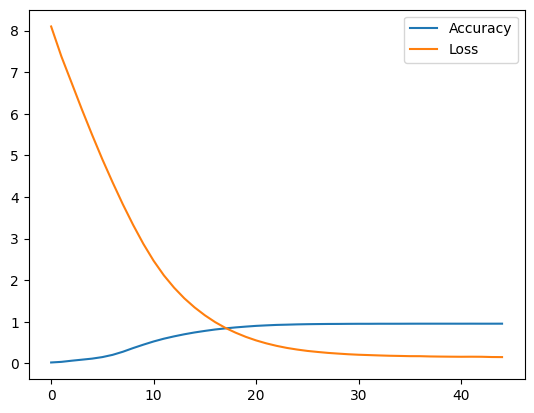

In [13]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-GRU**

In [14]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [15]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [16]:
with tf.device('gpu:0'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 65s 48ms/step - loss: 8.0897 - accuracy: 0.0254
Epoch 2/150
1312/1312 [==============================] - 58s 44ms/step - loss: 7.1061 - accuracy: 0.0525
Epoch 3/150
1312/1312 [==============================] - 57s 44ms/step - loss: 6.2833 - accuracy: 0.0844
Epoch 4/150
1312/1312 [==============================] - 58s 44ms/step - loss: 5.4934 - accuracy: 0.1162
Epoch 5/150
1312/1312 [==============================] - 57s 44ms/step - loss: 4.7495 - accuracy: 0.1638
Epoch 6/150
1312/1312 [==============================] - 57s 44ms/step - loss: 4.0606 - accuracy: 0.2375
Epoch 7/150
1312/1312 [==============================] - 57s 44ms/step - loss: 3.4400 - accuracy: 0.3355
Epoch 8/150
1312/1312 [==============================] - 57s 44ms/step - loss: 2.8792 - accuracy: 0.4337
Epoch 9/150
1312/1312 [==============================] - 57s 44ms/step - loss: 2.4001 - accuracy: 0.5239
Epoch 10/150
1312/1312 [==============================]

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

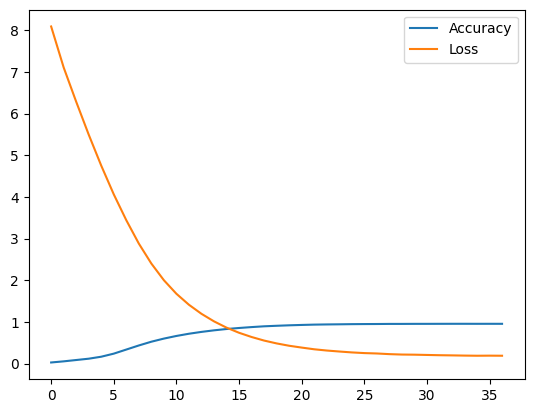

In [18]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-Bidirectional LSTM**

In [19]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [20]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [21]:
with tf.device('gpu:0'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 114s 84ms/step - loss: 8.0313 - accuracy: 0.0244
Epoch 2/150
1312/1312 [==============================] - 106s 80ms/step - loss: 7.0654 - accuracy: 0.0578
Epoch 3/150
1312/1312 [==============================] - 106s 81ms/step - loss: 6.1582 - accuracy: 0.0920
Epoch 4/150
1312/1312 [==============================] - 106s 81ms/step - loss: 5.1867 - accuracy: 0.1292
Epoch 5/150
1312/1312 [==============================] - 106s 81ms/step - loss: 4.2140 - accuracy: 0.1980
Epoch 6/150
1312/1312 [==============================] - 107s 81ms/step - loss: 3.3147 - accuracy: 0.3324
Epoch 7/150
1312/1312 [==============================] - 107s 81ms/step - loss: 2.5707 - accuracy: 0.4706
Epoch 8/150
1312/1312 [==============================] - 107s 81ms/step - loss: 1.9979 - accuracy: 0.5865
Epoch 9/150
1312/1312 [==============================] - 107s 82ms/step - loss: 1.5619 - accuracy: 0.6798
Epoch 10/150
1312/1312 [======================

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

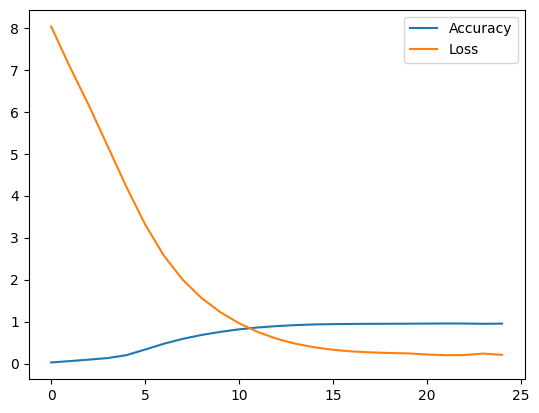

In [23]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Generating Text

**1-LSTM**

In [24]:
text = ""
number_of_words = 50
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
  
print("Generated Text:", text) 

Generated Text:  الْأُمُّ اِبْنَهَا سَافَرَ بَطَلُ أَثِينَا إِلَى مَدِينَةِ أَبِيهِ جَابَهَ بَطَلُ أَثِينَا الْكَثِيرَ مِنَ الْمَخَاطِرِ هَزَمَ بَطَلُ أَثِينَا كُلَّ الْأَشْرَارِ أَصْبَحَ النَّاسُ يُنَادُونَهُ بَطَلُ أَثِينَا عَرَفَتْ سَاحِرَةٌ شِرِّيرَةٌ أَنَّ بَطَلَ أَثِينَا هُوَ اِبْنُ الْمَلِكِ قَالَتِ السَّاحِرَةُ يُرِيدُ بَطَلُ أَثِينَا أَنْ يُبَدِّلَ الأَشْرِعَةَ السَّوْدَاءَ اِقْتَرَبَتِ السَّفِينَةُ مِنْ أَثِينَا كَانَ مَلِكُ أَثِينَا وَاقِفًا


**2-GRU**

In [25]:
text = ""
number_of_words = 55
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
  
print("Generated Text:", text) 

Generated Text:  الزَّوْجَةُ وَقَالَتْ لَا ظَنَنْتُ أَنِّي أَحْلُمُ أَوْ أَنِّي جُنِنْتُ هَذَا وَإِلَا طَرَدْتُكِ مِنْ بَيْتِي لَقَدْ أَرَادَ أَنْ أَنْ يَبْقَى فِي الْخَطَرِ حَتَّى لَا يَرَاهُ النَّاسُ قَالَتِ الزَّوْجَةُ هَذَا صَحِيحٌ رُبَّمَا أَرَادَ ذَلِكَ وَعَادَتْ إِلَى بَيْتِهَا كَيْ تَنْتَظِرَ زَوْجَهَا وَبَعْدَ مُنْتَصَفِ اللَّيْلِ عَادَتِ الزَّوْجَةُ إِلَى بَيْتِ عَلِي بَابَا وَقَالَت قَلْبِي غَيْرُ مُرْتَاحٍ أَبَدًا يَا عَلِي بَابَا


**3-Bidirectional LSTM**

In [30]:
text = ""
number_of_words = 50
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
  
print("Generated Text:", text) 

Generated Text:  الزَّوْجَةُ وَقَالَتْ سَوْفَ يُعَاقِبُكَ أَبُوكَ أَيْنَ لَا هَذِهِ الْمَلِكُ قَوِيَّةً تُرِيدُ لِأَنَّ هَذِهِ الأَرْضَ وَعَنْ هِيَ عَظِيمَةٌ كَبِيرَةٍ وَلَا أَحَدَ كُودُورَ عِنْدَمَا جَاءَ اللَّهُ بِهِ إِلَى النَّوْمِ فِي فَايِفَ مَاتُوا عِنْدَمَا التُّفَّاحَةَ كَثِيرٌ مِنَ اللُّصُوصِ سَوْفَ يَأْخُذُكَ التِّمْثَالُ الْمَسْحُورُ إِلَى بِلَادِكَ فِي عَشَرَةِ أَيَّامٍ لَا تَذْكُرْ اِسْمَ اللَّهِ وَأَنْتَ فِي


# Save The Models

In [27]:
LSTM.save('Arabic_LSTM.h5')

In [28]:
Bidirectional_LSTM.save('Arabic_Bidirectional_LSTM.h5')

In [29]:
GRU.save('Arabic_GRU.h5')